In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv("DataSet/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [48]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

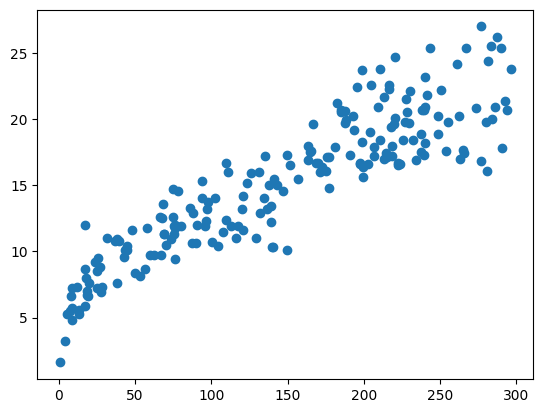

In [49]:
plt.scatter(df.TV, df.Sales)
# plt.show()

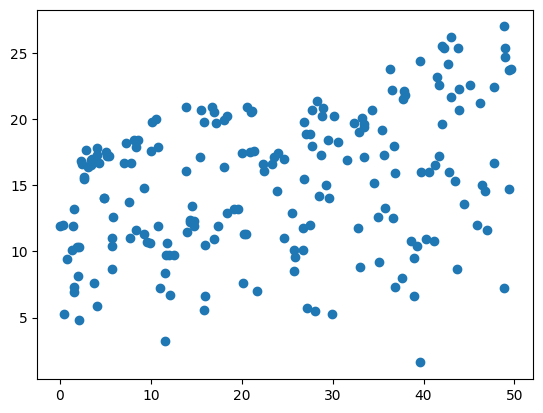

In [50]:
plt.cla()
plt.scatter(df.Radio, df.Sales)
# plt.show()

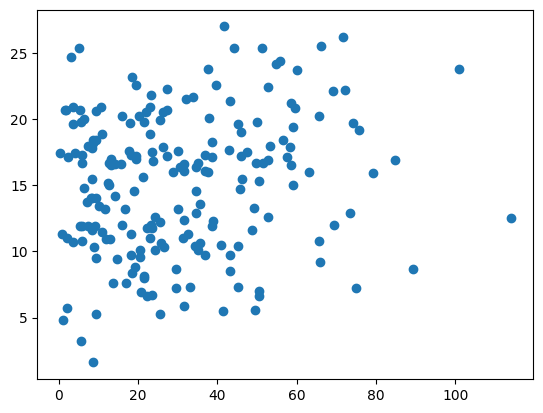

In [51]:
plt.scatter(df.Newspaper, df.Sales)

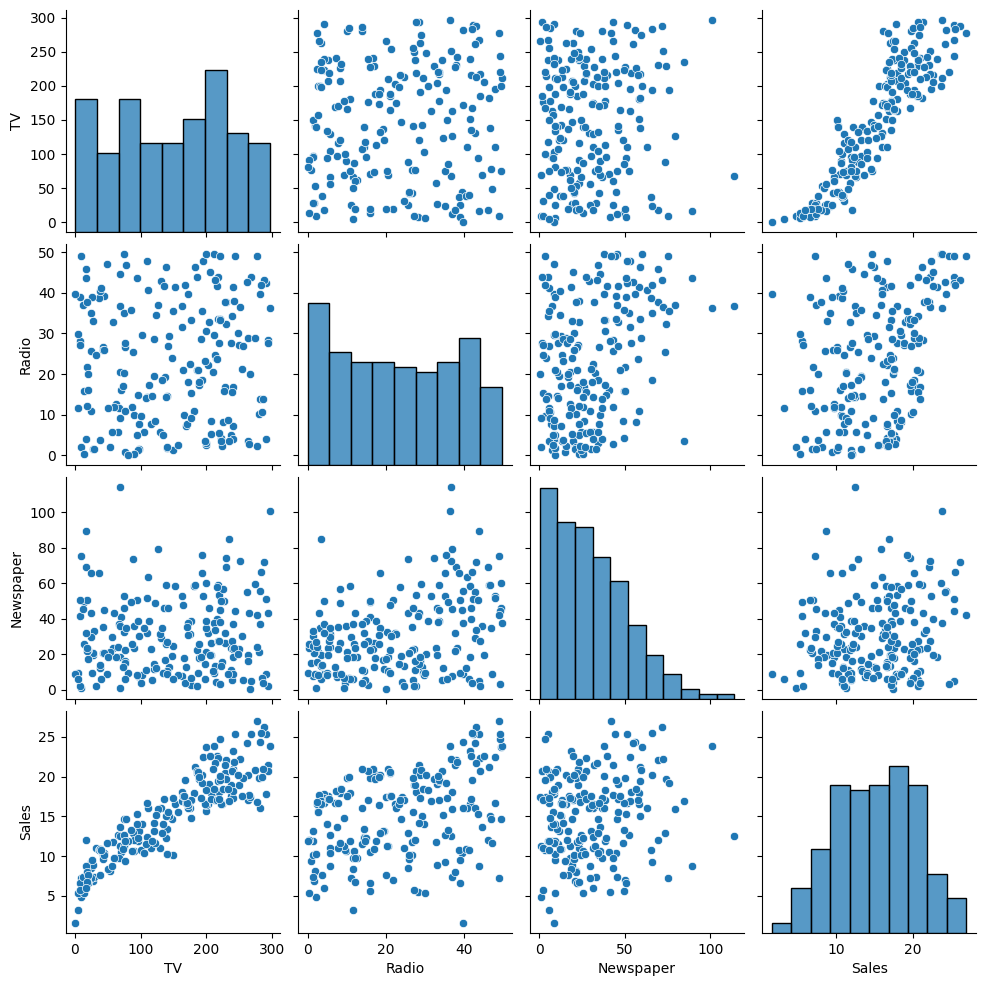

In [52]:
sns.pairplot(df)

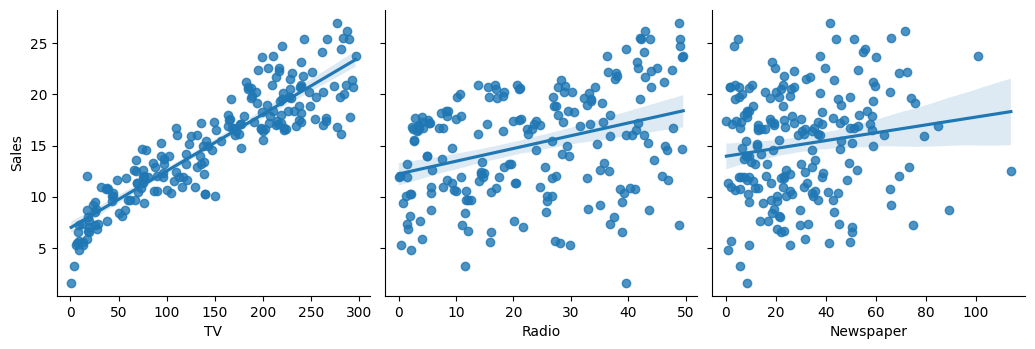

In [61]:
sns.pairplot(data=df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=3.5, kind='reg')

In [62]:
# Correlation
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<h3>Model</h3>

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [60]:
x = df.drop(["Sales"], axis=1)
y = df.Sales

In [64]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [65]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

<h3>Train & Evaluate</h3>

In [66]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [67]:
model.score(x, y)

0.9025912899684558

In [75]:
y_predict = model.predict(x)
y_predict

array([21.22097209, 11.26824775, 10.49620897, 17.31244651, 15.64413685,
       10.35633677, 11.2732847 , 13.27062458,  5.31839603, 15.78871013,
        8.8527202 , 18.88400523,  9.69879662, 10.74921373, 19.27328852,
       20.38554445, 12.27105794, 24.20214502, 10.5924398 , 15.20872794,
       19.49794066, 18.10414656,  7.06177654, 18.87221072,  9.37145421,
       19.31996936, 15.54479137, 19.49216302, 21.07865408, 10.19471067,
       23.61492832, 12.64683045, 10.08782551, 21.2260486 ,  9.98787085,
       20.89407055, 23.84503494, 13.99342411,  9.8404516 , 21.08344935,
       18.04712878, 17.84885818, 23.57494339, 16.79762772,  8.75617872,
       16.57668108, 10.58020572, 22.13342743, 18.70257411,  9.53181337,
       15.84670856, 11.11990058, 20.88243422, 19.53008343, 22.01500291,
       20.76038994,  8.04320903, 14.10063486, 21.4222098 , 19.25650785,
        7.75915886, 23.43911942, 19.32168181, 13.3867616 , 16.35231896,
        9.37729644,  8.97313482, 13.7643628 , 20.49677834, 21.13

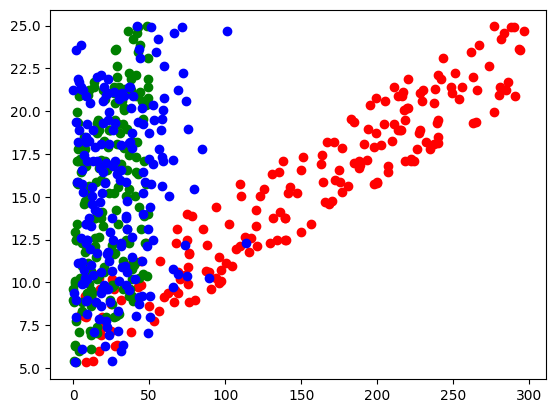

In [97]:
# plt.plot(df["TV"], df["Sales"], color="k")
plt.scatter(df["TV"], y_predict, color="r")
plt.scatter(df["Radio"], y_predict, color="g")
plt.scatter(df["Newspaper"], y_predict, color="b")

In [76]:
mae = mean_absolute_error(y, y_predict)
mse = mean_squared_error(y, y_predict)
rmse = np.sqrt(mean_squared_error(y, y_predict))
print("MAE = {}, MSE = {}, RMSE = {:.4f}".format(mae, mse, rmse))

MAE = 1.2363919943957848, MSE = 2.706006147627315, RMSE = 1.6450


In [77]:
r2_score(y, y_predict)

0.9025912899684558

In [78]:
x_input = [[125.1, 9.8, 27.1]]
model.predict(x_input)

C:\Users\Two\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.49399957])

<h3>Model Formular</h3>

In [82]:
model.coef_ # Slove Value

array([0.05444578, 0.10700123, 0.00033566])

In [83]:
model.intercept_

4.625124078808653